In [116]:
%load_ext autoreload

%autoreload 2
import sys
import corner
import numpy as np
import matplotlib.pyplot as plt
import scipy
import astropy.units as u
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import covariance as covar
import utils
import pandas as pd
import abundance as cl_count
import forecast
import emcee
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/mcmc_modules')
#import unbinned_model_hybrid as ub
#from lnlikelihood import lnLikelihood
import pyccl as ccl
import edit
import h5py, glob
from astropy.coordinates import SkyCoord
from astropy.table import Table
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
redshift_intervals = [[0.2, 0.25],[0.25, 0.3],[0.3, 0.5], ]

In [118]:
where_cat = '/sps/lsst/users/cpayerne/1000xsimulations/1000_simulations/afumagalli/catalogs/plc_14/*'
cat = glob.glob(where_cat)
cat_test = pd.read_csv(cat[35] ,sep=' ',skiprows=12, names=['M','z','dec','ra'])
ra, dec, redshift, Mvir = cat_test['ra'], cat_test['dec'], cat_test['z'], cat_test['M']/0.6777
#mask = (redshift > .2)&(redshift < .5)
#mask = mask &(np.log10(Mvir) > 14.8)&(np.log10(Mvir) < 15.6)
redshift_cut = redshift
Mvir_cut = Mvir
z_sample = redshift_cut
logm_sample = np.log10(Mvir_cut)

In [120]:
mask_random = np.random.choice(np.arange(len(redshift_cut)), 100, replace=False)
redshift_cut_small = redshift[mask_random]
Mvir_cut_small = Mvir[mask_random]

(0.2, 0.8)

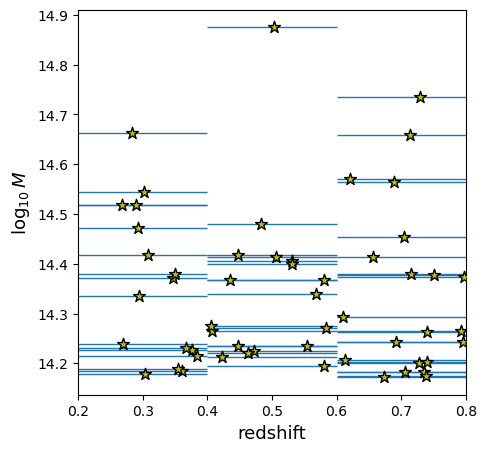

In [124]:
mask_random = np.arange(100)
plt.figure(figsize=(5,5),)
redshift_intervals = [[0.2, 0.4],[0.4, 0.6],[0.6, 0.8], ]
mask_z = (redshift_cut_small > 0.2)*(redshift_cut_small < 0.8)
plt.scatter(redshift_cut_small[mask_z], np.log10(Mvir_cut_small[mask_z]), s=80, color='y', zorder=100000, marker='*',edgecolors='k',)
for i in range(3):
    mask = (redshift_cut_small[mask_z] > redshift_intervals[i][0])*(redshift_cut_small[mask_z] < redshift_intervals[i][1])
    for logm, z in zip(Mvir_cut_small[mask_z][mask], redshift_cut_small[mask_z][mask]):
        plt.hlines(np.log10(logm), redshift_intervals[i][0],redshift_intervals[i][1], lw=1)
plt.xlabel('redshift', fontsize=13)
plt.ylabel(r'$\log_{10}M$', fontsize=13)
plt.xlim(0.2, 0.8)
#plt.savefig('sigma.pdf', bbox_inches='tight', dpi=300)